In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'
path

Path('/Users/siddharthnarolia/.fastai/data/oxford-iiit-pet/images')

In [3]:
"""
In the sample images downloaded above,
the cat images names start from UPPERCASE and Dog images name start with lowercase
"""

def is_cat(x): return x[0].isupper()

In [9]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(150)
)

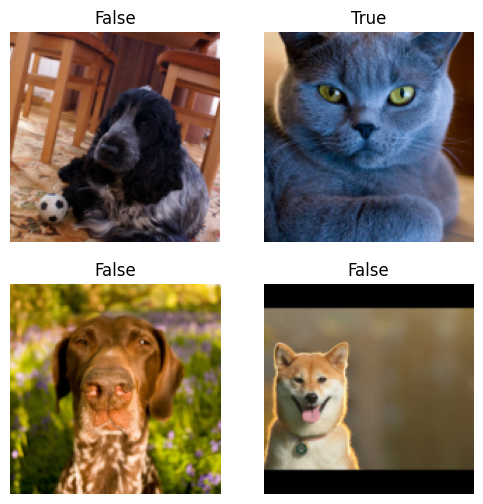

In [10]:
dls.show_batch(max_n=4)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.285703,0.087721,0.033829,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.111957,0.097454,0.027064,00:41
1,0.059051,0.059170,0.018945,00:39
2,0.027786,0.047382,0.017591,00:40


In [12]:
learn.predict("/Users/siddharthnarolia/Projects/Github/DLPractise/notebooks/datasets/dogs/dog.1.jpg")

('False', tensor(0), tensor([9.9986e-01, 1.3617e-04]))

In [14]:
learn.export("models/cat_classify.pkl")